# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [2]:
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [3]:
data = pd.read_csv("marketing.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [4]:
data.shape

(2240, 27)

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [6]:
# Median imputation to missing values

data['Income'] = data['Income'].fillna(data['Income'].median())
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [7]:
data_duplicate = data.drop_duplicates(subset=None, keep='first', inplace = True, ignore_index= False)

In [8]:
data_duplicate

In [9]:
print("Clean dataset shape is: ", data.shape)

Clean dataset shape is:  (2240, 27)


### 5. Drop the columns which you think redundant for the analysis 

In [10]:
data = data.drop('ID', axis=1)
data.shape

(2240, 26)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [11]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [12]:
data['Marital_Status'] = data['Marital_Status'].replace({'Married':'Relationship', 'Together':'Relationship',
                                                       'Divorced':'Single','Widow':'Single', 'Alone': 'Single', 'YOLO':'Single',
                                                       'Absurd':'Single'})

In [13]:
data['Marital_Status'].value_counts()

Marital_Status
Relationship    1444
Single           796
Name: count, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [14]:
data['Total_Expenses'] = data.iloc[:,-21:-15].sum(axis=1)
data

TypeError: unsupported operand type(s) for +: 'int' and 'str'

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [15]:
data['Num_Total_Purchases'] = data.iloc[:,-15:-11].sum(axis=1)
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Num_Total_Purchases
0,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,...,4,7,0,0,0,0,0,0,1,351
1,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,...,2,5,0,0,0,0,0,0,0,11
2,1965,Graduation,Relationship,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,175
3,1984,Graduation,Relationship,26646.0,1,0,10/2/2014,26,11,4,...,4,6,0,0,0,0,0,0,0,20
4,1981,PhD,Relationship,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Relationship,61223.0,0,1,13-06-2013,46,709,43,...,4,5,0,0,0,0,0,0,0,409
2236,1946,PhD,Relationship,64014.0,2,1,10/6/2014,56,406,0,...,5,7,0,0,0,1,0,0,0,15
2237,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,13,6,0,1,0,0,0,0,0,69
2238,1956,Master,Relationship,69245.0,0,1,24-01-2014,8,428,30,...,10,3,0,0,0,0,0,0,0,173


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [16]:
data['Kids'] = data.iloc[:,4:6].sum(axis=1)
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Num_Total_Purchases,Kids
0,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,...,7,0,0,0,0,0,0,1,351,0
1,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,...,5,0,0,0,0,0,0,0,11,2
2,1965,Graduation,Relationship,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,0,175,0
3,1984,Graduation,Relationship,26646.0,1,0,10/2/2014,26,11,4,...,6,0,0,0,0,0,0,0,20,1
4,1981,PhD,Relationship,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,0,93,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Relationship,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,0,409,1
2236,1946,PhD,Relationship,64014.0,2,1,10/6/2014,56,406,0,...,7,0,0,0,1,0,0,0,15,3
2237,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,0,69,0
2238,1956,Master,Relationship,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,0,173,1


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [17]:
column_names = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response']
data['TotalAcceptedCmp']= data[column_names].sum(axis=1)

In [18]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,...,0,0,0,0,0,0,1,351,0,1
1,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,...,0,0,0,0,0,0,0,11,2,0
2,1965,Graduation,Relationship,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,0,175,0,0
3,1984,Graduation,Relationship,26646.0,1,0,10/2/2014,26,11,4,...,0,0,0,0,0,0,0,20,1,0
4,1981,PhD,Relationship,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,0,93,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Relationship,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,0,409,1,0
2236,1946,PhD,Relationship,64014.0,2,1,10/6/2014,56,406,0,...,0,0,0,1,0,0,0,15,3,1
2237,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,0,69,0,1
2238,1956,Master,Relationship,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,0,173,1,0


### 11. Drop those columns which we have used above for obtaining new features

In [46]:
data = data.drop(columns=['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response',
                         'Kidhome','Teenhome','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases',
                         'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'],axis=1)

In [47]:
data.shape

(2240, 11)

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [48]:
from datetime import datetime, date

In [49]:
data['Current_Year'] = datetime.now().year


In [53]:
data['Age'] = data['Current_Year'] - data['Year_Birth']

KeyError: 'Current_Year'

In [54]:
data

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Clusters
0,2,0,58138.0,58,7,0,351,0,1,66,0
1,2,0,46344.0,38,5,0,11,2,0,69,3
2,2,1,71613.0,26,4,0,175,0,0,58,0
3,2,1,26646.0,26,6,0,20,1,0,39,3
4,4,1,58293.0,94,5,0,93,1,0,42,1
...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,61223.0,46,5,0,409,1,0,56,0
2236,4,1,64014.0,56,7,0,15,3,1,77,1
2237,2,0,56981.0,91,6,0,69,0,1,42,0
2238,3,1,69245.0,8,3,0,173,1,0,67,0


In [55]:
# Deleting the temporary column
data = data.drop('Current_Year',axis=1)
data

KeyError: "['Current_Year'] not found in axis"

In [56]:
# Deleting the old column
data = data.drop('Year_Birth', axis=1)
data

KeyError: "['Year_Birth'] not found in axis"

### 13. Encode the categorical variables in the dataset

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int32  
 1   Marital_Status       2240 non-null   int64  
 2   Income               2240 non-null   float64
 3   Recency              2240 non-null   int64  
 4   NumWebVisitsMonth    2240 non-null   int64  
 5   Complain             2240 non-null   int64  
 6   Num_Total_Purchases  2240 non-null   int64  
 7   Kids                 2240 non-null   int64  
 8   TotalAcceptedCmp     2240 non-null   int64  
 9   Age                  2240 non-null   int64  
 10  Clusters             2240 non-null   int64  
dtypes: float64(1), int32(1), int64(9)
memory usage: 183.9 KB


In [58]:
data['Education'].value_counts()

Education
2    1127
4     486
3     370
0     203
1      54
Name: count, dtype: int64

In [59]:
# Label Encoding the 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Education'] = labelencoder.fit_transform(data.Education)
data.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Clusters
0,2,0,58138.0,58,7,0,351,0,1,66,0
1,2,0,46344.0,38,5,0,11,2,0,69,3
2,2,1,71613.0,26,4,0,175,0,0,58,0
3,2,1,26646.0,26,6,0,20,1,0,39,3
4,4,1,58293.0,94,5,0,93,1,0,42,1


In [60]:
data['Marital_Status'].value_counts()

Marital_Status
1    1444
0     796
Name: count, dtype: int64

In [61]:
data['Marital_Status'] = data['Marital_Status'].replace({'Relationship': 1, 'Single':0})
data['Marital_Status'].value_counts()

Marital_Status
1    1444
0     796
Name: count, dtype: int64

In [34]:
data = data.drop('Dt_Customer',axis=1)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int32  
 1   Marital_Status       2240 non-null   int64  
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

### 14. Standardize the columns, so that values are in a particular range

In [36]:
ds = data.copy()

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)

In [37]:
scaled_ds.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,...,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,2.388846,2.029885,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,...,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,-0.845010,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,...,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,0.541704,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,...,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,-0.768910,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,...,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,-0.151653,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [38]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,2.061843e-16,2.796429,-5.335897,-2.435398,-0.826582,2.052717,8.877077
col2,2240.0,1.586033e-18,1.637632,-3.846339,-0.893079,-0.131100,0.308243,9.577222
col3,2240.0,-1.237106e-16,1.530339,-3.181757,-1.312195,-0.125529,1.087222,5.495648


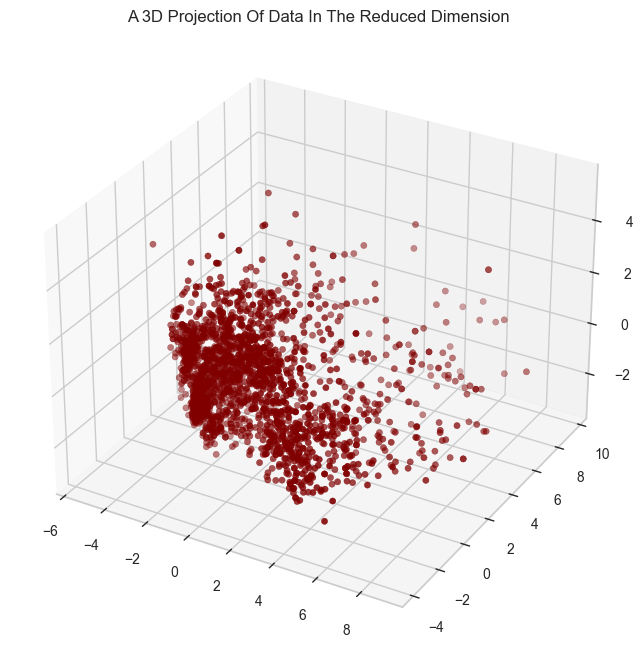

In [39]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

Elbow Method to determine the number of clusters to be formed:


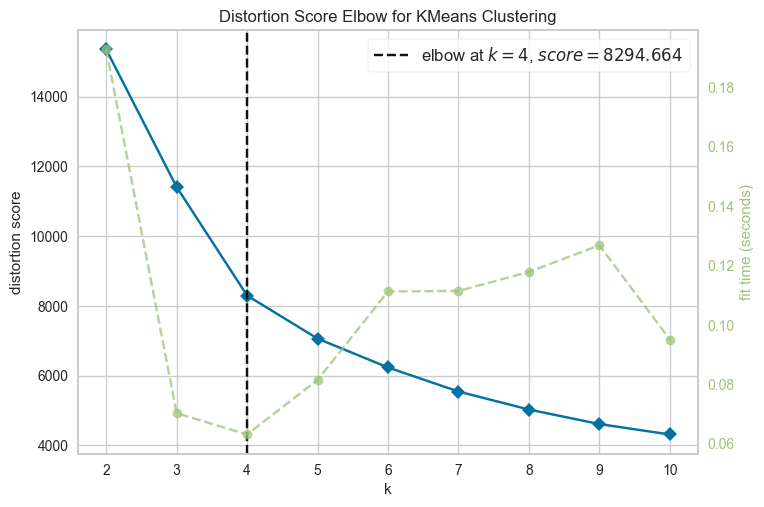

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

In [41]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

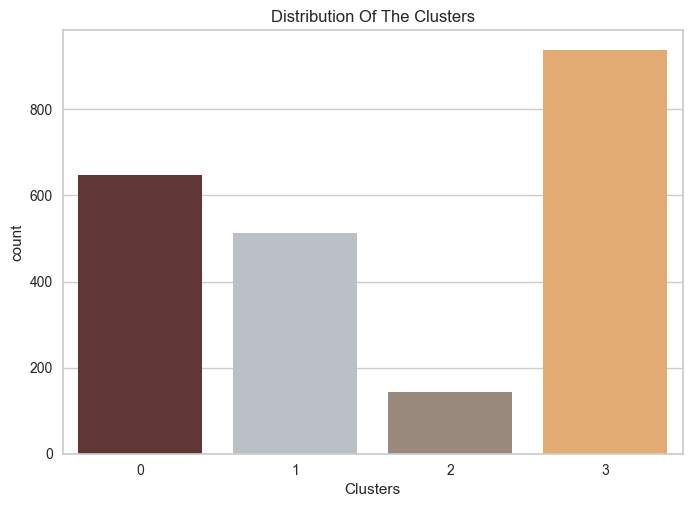

In [42]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

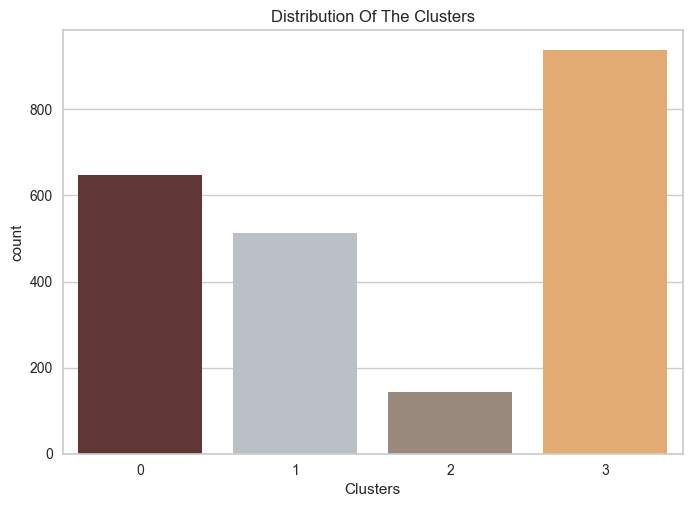

In [42]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [43]:
pl = sns.scatterplot(data = data,x=data["Total_Expenses"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

KeyError: 'Total_Expenses'

In [44]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Total_Expenses"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Total_Expenses"], palette=pal)
plt.show()

KeyError: 'Total_Expenses'

<Figure size 800x550 with 0 Axes>

### Visualization and Interpretation of results

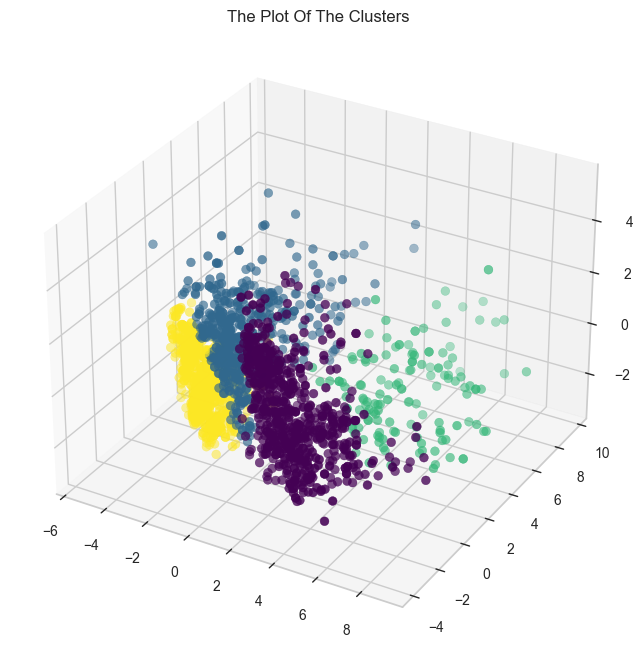

In [45]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

-----
## Happy Learning
-----